## <center>Scripting Week 6</center>
# <center>Visualization</center>

In [2]:
%matplotlib inline
import pandas as pd

## Today

- Visualization
- Wide vs. Long - reshaping
- Collecting Data
- Joins in Pandas
- More Practice!

## Anouncements

- 2022 Summer Conference on Applied Data Science
    - June 13-August 5, 2022
    - North Carolina State University, Raleigh, NC
    - Includes student stipends for data science and knowledge management skills

## Final Project Ideas

# Review

## Selection with Dataframes

`df[         ]`

- `'string'`, `0`
- `['list', 'of', 'strings']`
- `[True, False, True]`
- `1:3`

## JOINS

Most joins that you need to do are INNER JOINs - combining rows only when both tables overlap on the joining field.

If `SELECT * FROM circulation JOIN books ON books.id == book_id`,

- an INNER JOIN will return only rows of `circulation` where the `book_id` is also in `books.id`, joined with rows of `books` where `id` is in `circulation.book_id`

In [3]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/circulation.sqlite')

In [4]:
sample_books = pd.read_sql("SELECT * FROM sbooks", engine)
sample_books

,id,title,author
0,1670,Nineteen Minutes,Jodi Picoult
1,251,The Prodigal Daughter,Jeffrey Archer
2,833,The Phantom of the Opera - Movie Selections,Andrew Lloyd Webber
3,978,Edipo Rey,Sophocles
4,625,La ferme des animaux,George Orwell


In [5]:
sample_circ = pd.read_sql("SELECT * FROM scirculation", engine)
sample_circ

,book_id,checkout_time
0,499,2017-12-21 13:20:29.000000
1,978,2017-04-26 15:32:17.000000
2,883,2017-09-25 12:48:34.000000
3,625,2017-05-19 20:37:09.000000


<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In groups of two or three, see if you can figure out what rows are returned with different JOINS:

- What does an `INNER JOIN` look like?
- What does an `LEFT JOIN` look like?
- What does an `RIGHT JOIN` look like?
- What does a `FULL OUTER JOIN` look like?

<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In [7]:
%load_ext sql

In [8]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM scirculation JOIN sbooks ON scirculation.book_id == sbooks.id;

Done.


book_id,checkout_time,id,title,author
978,2017-04-26 15:32:17.000000,978,Edipo Rey,Sophocles
625,2017-05-19 20:37:09.000000,625,La ferme des animaux,George Orwell


<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In [9]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM scirculation LEFT JOIN sbooks ON scirculation.book_id == sbooks.id;

Done.


book_id,checkout_time,id,title,author
499,2017-12-21 13:20:29.000000,None,None,None
978,2017-04-26 15:32:17.000000,978,Edipo Rey,Sophocles
883,2017-09-25 12:48:34.000000,None,None,None
625,2017-05-19 20:37:09.000000,625,La ferme des animaux,George Orwell


<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In [10]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM scirculation RIGHT JOIN sbooks ON scirculation.book_id == sbooks.id;

(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT * FROM scirculation RIGHT JOIN sbooks ON scirculation.book_id == sbooks.id;]
(Background on this error at: http://sqlalche.me/e/14/e3q8)


They're so rare, that SQLite doesn't even support them!

Let's try the equivalent in Pandas.

In [11]:
sample_books.merge(sample_circ,
                   left_on='id',
                    right_on='book_id',
                   how='inner')

,id,title,author,book_id,checkout_time
0,978,Edipo Rey,Sophocles,978,2017-04-26 15:32:17.000000
1,625,La ferme des animaux,George Orwell,625,2017-05-19 20:37:09.000000


In [12]:
sample_books.merge(sample_circ,
                   left_on='id',
                   right_on='book_id',
                   how='right')

,id,title,author,book_id,checkout_time
0,NaN,NaN,NaN,499,2017-12-21 13:20:29.000000
1,978.0,Edipo Rey,Sophocles,978,2017-04-26 15:32:17.000000
2,NaN,NaN,NaN,883,2017-09-25 12:48:34.000000
3,625.0,La ferme des animaux,George Orwell,625,2017-05-19 20:37:09.000000


In [13]:
sample_books.merge(sample_circ,
                   left_on='id',
                   right_on='book_id',
                   how='outer')

,id,title,author,book_id,checkout_time
0,1670.0,Nineteen Minutes,Jodi Picoult,NaN,NaN
1,251.0,The Prodigal Daughter,Jeffrey Archer,NaN,NaN
2,833.0,The Phantom of the Opera - Movie Selections,Andrew Lloyd Webber,NaN,NaN
3,978.0,Edipo Rey,Sophocles,978.0,2017-04-26 15:32:17.000000
4,625.0,La ferme des animaux,George Orwell,625.0,2017-05-19 20:37:09.000000
5,NaN,NaN,NaN,499.0,2017-12-21 13:20:29.000000
6,NaN,NaN,NaN,883.0,2017-09-25 12:48:34.000000


![test](../images/scirc_fulljoin.png)

## Wide vs Long Data

In [14]:
app = pd.read_csv('../data/IMLS_Appropriations__FY_2002-2017_.csv')
app.head()

,Authority,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,LSTA: Grants to States,154848000,155789000,154848000,154848000,150000000,156365000,160032000,172561000,171500000,160885000,163746000,163746000,160704000,157628000,150435000,149014000
1,LSTA: Native American Library Services,3861000,4063000,3861000,3861000,3667000,3869000,3960000,4000000,3717000,3574000,3638000,3638000,3472000,3206000,3055000,2941000
2,LSTA: National Leadership: Libraries,13720000,13092000,12200000,12200000,11377000,11946000,12225000,12437000,12437000,12159000,12375000,12375000,12301000,11263000,11009000,11081000
3,LSTA: Laura Bush 21st Century Librarian,10000000,10000000,10000000,10000000,10000000,12524000,12818000,24525000,24525000,23345000,23760000,23760000,22816000,19882000,9935000,0
4,"SUBTOTAL, LIBRARY SERVICES TECHNOLOGY ACT (LSTA)",182429000,182944000,180909000,180909000,175044000,184704000,189035000,213523000,212179000,199963000,203519000,203519000,199293000,191979000,174434000,163036000


In [15]:
long_app = pd.melt(app, id_vars='Authority',
                   var_name='year', value_name='money')
long_app

,Authority,year,money
0,LSTA: Grants to States,2017,154848000
1,LSTA: Native American Library Services,2017,3861000
2,LSTA: National Leadership: Libraries,2017,13720000
3,LSTA: Laura Bush 21st Century Librarian,2017,10000000
4,"SUBTOTAL, LIBRARY SERVICES TECHNOLOGY ACT (LSTA)",2017,182429000
...,...,...,...
283,AAHCA: Museum Grants for African American Hist...,2002,0
284,"SUBTOTAL, ALL MUSEUM PROGRAMS (MSA & AFRICAN A...",2002,24229000
285,MUSEUM AND LIBRARY SERVICES ACT (MLSA) GENERAL...,2002,7712000
286,CONGRESSIONAL EARMARKS,2002,29524000


In [16]:
enwidened = long_app.pivot(index='Authority', columns='year')
enwidened.head()

money             \
year                                                     2002       2003   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...          0          0   
CONGRESSIONAL EARMARKS                               29524000   35156000   
LSTA: Grants to States                              149014000  150435000   
LSTA: Laura Bush 21st Century Librarian                     0    9935000   
LSTA: National Leadership: Libraries                 11081000   11009000   

                                                                          \
year                                                     2004       2005   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...          0          0   
CONGRESSIONAL EARMARKS                               32595000   39889000   
LSTA: Grants to States                              157628000  160704000   
LSTA: Laura Bush 21st Century Librarian              19882000   22816000   
LSTA: National Leadership: Libraries                 11263000   12301000   

                                                                          \
year                                                     2006       2007   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...     842000     842000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States                              163746000  163746000   
LSTA: Laura Bush 21st Century Librarian              23760000   23760000   
LSTA: National Leadership: Libraries                 12375000   12375000   

                                                                          \
year                                                     2008       2009   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...     827000    1310000   
CONGRESSIONAL EARMARKS                               18285000   10737000   
LSTA: Grants to States                              160885000  171500000   
LSTA: Laura Bush 21st Century Librarian              23345000   24525000   
LSTA: National Leadership: Libraries                 12159000   12437000   

                                                                          \
year                                                     2010       2011   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1485000    1443000   
CONGRESSIONAL EARMARKS                               16382000          0   
LSTA: Grants to States                              172561000  160032000   
LSTA: Laura Bush 21st Century Librarian              24525000   12818000   
LSTA: National Leadership: Libraries                 12437000   12225000   

                                                                          \
year                                                     2012       2013   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1410000    1336000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States                              156365000  150000000   
LSTA: Laura Bush 21st Century Librarian              12524000   10000000   
LSTA: National Leadership: Libraries                 11946000   11377000   

                                                                          \
year                                                     2014       2015   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1407000    1407000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States

Wickham, Hadley. (2014). *Tidy Data.* The Journal of Statistical Software, vol. 59, 2014.

> Tidy datasets are easy to manipulate, model and visualize, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit is a table. 

What type of data is that?

Long data is the trend, but there are reasons for either version.

Pros:
 - Structure doesn't change when adding data - rows are added by not columns.
 - Column names aren't *data*, just *metadata*
 - Easier for split-apply-combine patterns
 - Multi-dimensional (>2) data easier to preserve
    
Cons:
 - Sometimes tougher to read (e.g. comparing a progression over years)
 - Old stats software can favor wide

# Characterizing Data

What do we need to know about our data before visualizing it?

- Number of dimensions
- Type of data
    - Discrete vs. Continuous
    - Dependent and Independent variables
    - Relationships: nominal, ordinal, numeric

## Discrete vs. Continous

*Discrete* variables are countable, and exist on a identifiable, finite scale.

- How many plants do you have?
- What was the result of a coin flip?

*Continous* variables exist in an infinite scale.

- How much does a cat weigh?
- At what time was a book checked out?

Think of your range of realistic values: can you only select specific values within that range, or can you feasibly select any value?

- *How many books are checked out?*
- *What was the temperature yesterday?*

* You can group by discrete variables. Grouping by continous variables would be pointless.

### Precision

* Much data is discrete but sampled from a continous distribution. This can be treated as continous data.

e.g. Age saved by year, even though you *could* have infinite precision.

<center><h3>Types of Discrete Variables</h3></center>

*Nominal*: Can be counted but not ordered.

<small>e.g. Country GDP (is there a natural order between China, Lichtenstein, and US?)</small>

*Ordinal*: Can be counted and ordered.

<small>e.g. Online product ratings</small>

*Numerical* or *interval*: Ordered, with a meaningful relationship/distance between values.

<small>e.g. Counts or frequencies</small>

## Independent vs. Dependent

- Independent: The variable that is controlled in an experiment
    - e.g. 'age', 'gender'
    - e.g. 'diet' in a study of healthy eating
- Dependent: The variable that is measured or changes
    - e.g. 'blood pressure', 'weight' in a study of healthy eating

Outside of experimental design, you don't always know what's dependent or independent.

## Number of Dimensions

How many different variables are you trying to visualize at once?

Examples:

- Univariate: Heights of a group of people
- 2-dimensional: What's the relationship between cyclinders in an engine and fuel economy?
- 3-dimensional: What's the relationship between cylinders in an engine and fuel economy, grouped by weight class?

## Size of the Data

How many data points do you have?

If not many: no need to visualize!

## Relationships

- Heirarchical: some measures have parent/child relationships.
    - e.g. folder size on your computer, book counts by call number
- Network relationships: links between data points.
    - e.g. social network data

## Exercises

In [17]:
cats = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/cat_data.tsv', sep='\t')
beer = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/beers.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/movielens_small.csv')
imls = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/imls_mini_by_state.csv')
mpg = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv', index_col=0)

In [18]:
cats.head()

,Sex,Bwt,Hwt
0,M,2.0,6.5
1,M,2.0,6.5
2,M,2.1,10.1
3,M,2.2,7.2
4,M,2.2,7.6


- Sex: Categorical
- Bwt: Continuous
- Hwt: Continuous

In [19]:
beer.head()

,abv,ibu,id,name,type,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


- abv: continuous
- type: nominal
- ounces: continuous or interval

In [20]:
movies.head()

,userId,rating,title,genres,timestamp,year
0,1,2.5,Dangerous Minds,Drama,1260759144,1995
1,7,3.0,Dangerous Minds,Drama,851868750,1995
2,31,4.0,Dangerous Minds,Drama,1273541953,1995
3,32,4.0,Dangerous Minds,Drama,834828440,1995
4,36,3.0,Dangerous Minds,Drama,847057202,1995


- genres: nominal/categorical
- rating: ordinal (often treated as interval)
- timestamp: continuous
- year: continuous or interval

# Visualization

Why visualize?

## Visualization in Pandas

Pandas uses a library called `matplotlib` under the hood - another part of the 'Scipy Stack'.

Basic line plot:

```
df.plot()
```

That's it!

In [21]:
# Changing default plot size 
# (IGNORE -- this is for better slide presentation)
import matplotlib
# Default (6,4) at DPI 72
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['figure.dpi'] = (150)

*What's the y-axis? What's the x-axis?*

Hmmm... some problems:
- There's no continuous dependent variable for a line chart.
- It tries to plot *every* int or float column as a line.
- The 'index as x-axis' isn't insightful.

Explicitly setting an x and y plot:

```python
df.plot(x=..., y=...)
```

e.g.

<AxesSubplot:xlabel='Bwt'>

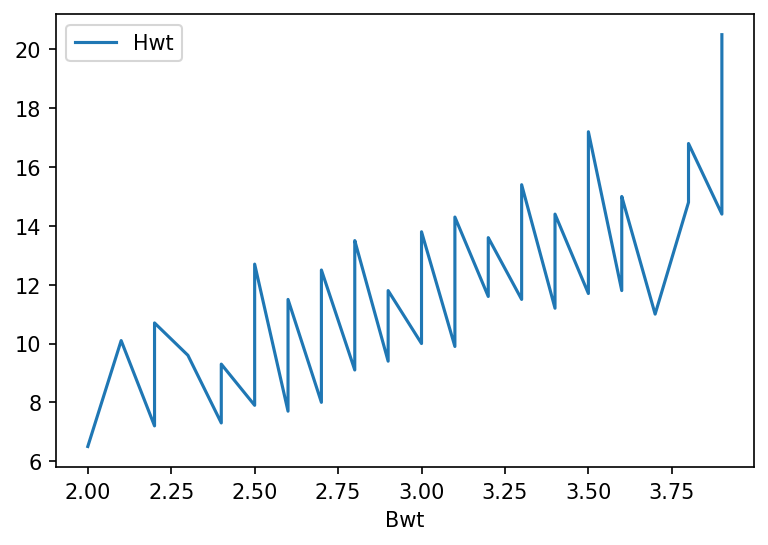

In [22]:
cats.plot(x='Bwt', y='Hwt')

## Setting the type of plot

Use the `kind` argument:

<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

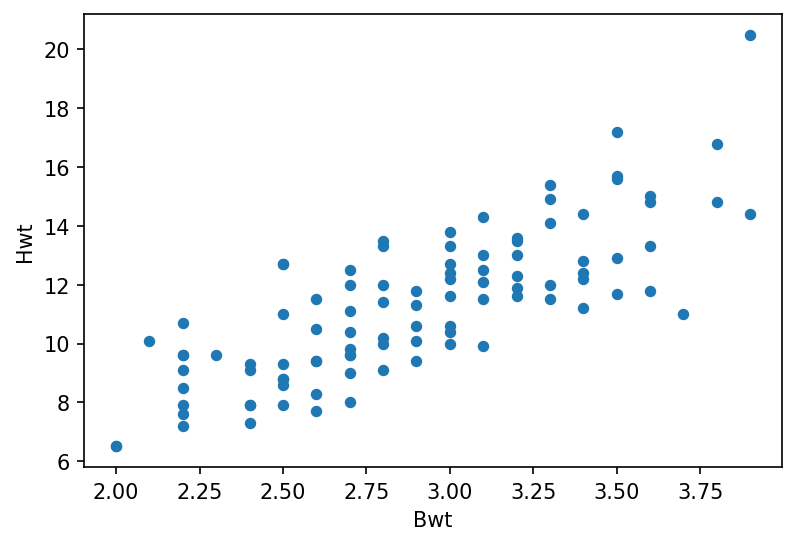

In [23]:
cats.plot(x='Bwt', y='Hwt', kind='scatter')

# Kinds of Plots in Matplotlib

## *Bar Chart* and *Horizontal Bar Chart*

`kind='bar'`, `kind='barh'`

Good for categorical discrete data.

Dimensions: 2 axes. Color can be used for 3rd dimension.

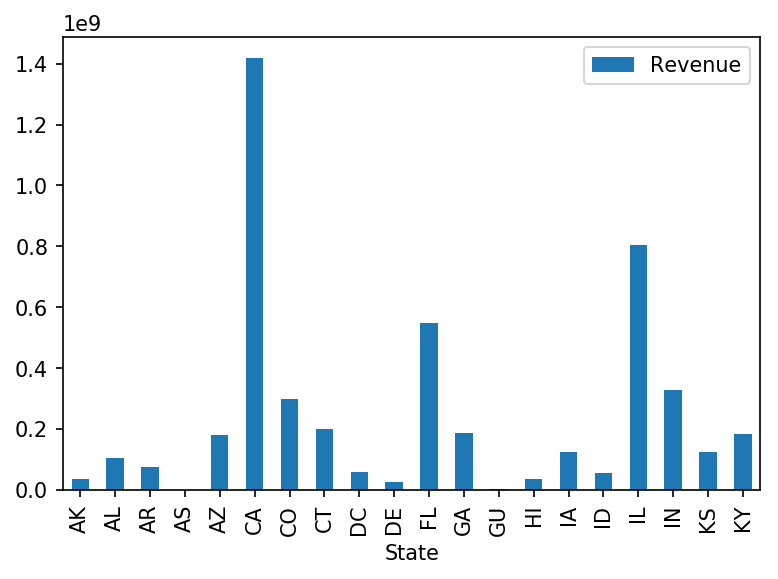

In [39]:
imls.head(20).plot(kind='bar', x='State', y='Revenue')

You can add more arguments to customize it the plot.

<AxesSubplot:xlabel='State'>

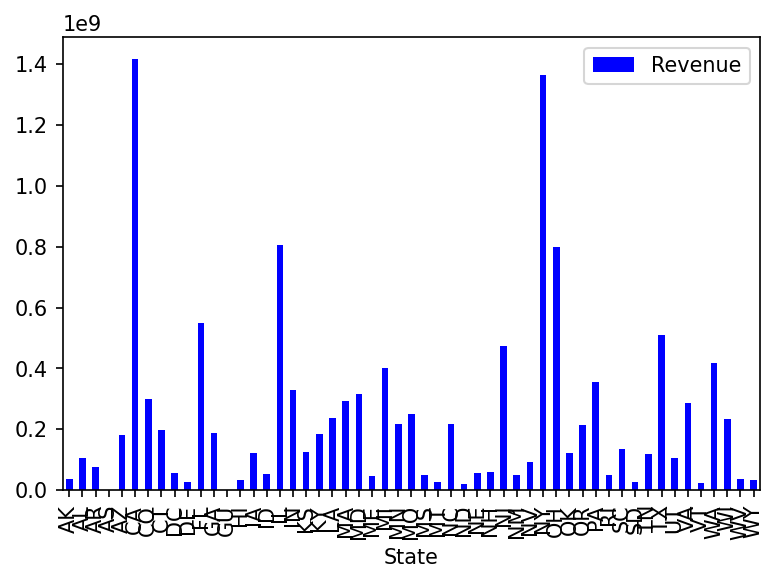

In [24]:
imls.plot(kind='bar', x='State', y='Revenue', color='blue')

FYI: Our 'easy' approach to visualization, through Pandas, can take color names or codes, but you can't easily color against a variable.

'barh' is just 'bar' rotated (literally - 'x' refers to the vertical axis).

Good for many categories: easier to read and - on screens - the height of an image can scale better than the width.

<AxesSubplot:ylabel='State'>

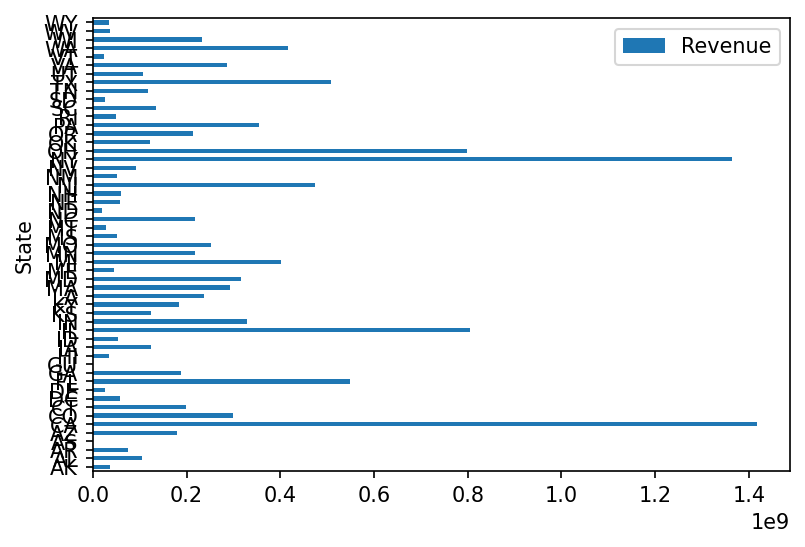

In [25]:
imls.plot(kind='barh', x='State', y='Revenue') 

<AxesSubplot:ylabel='State'>

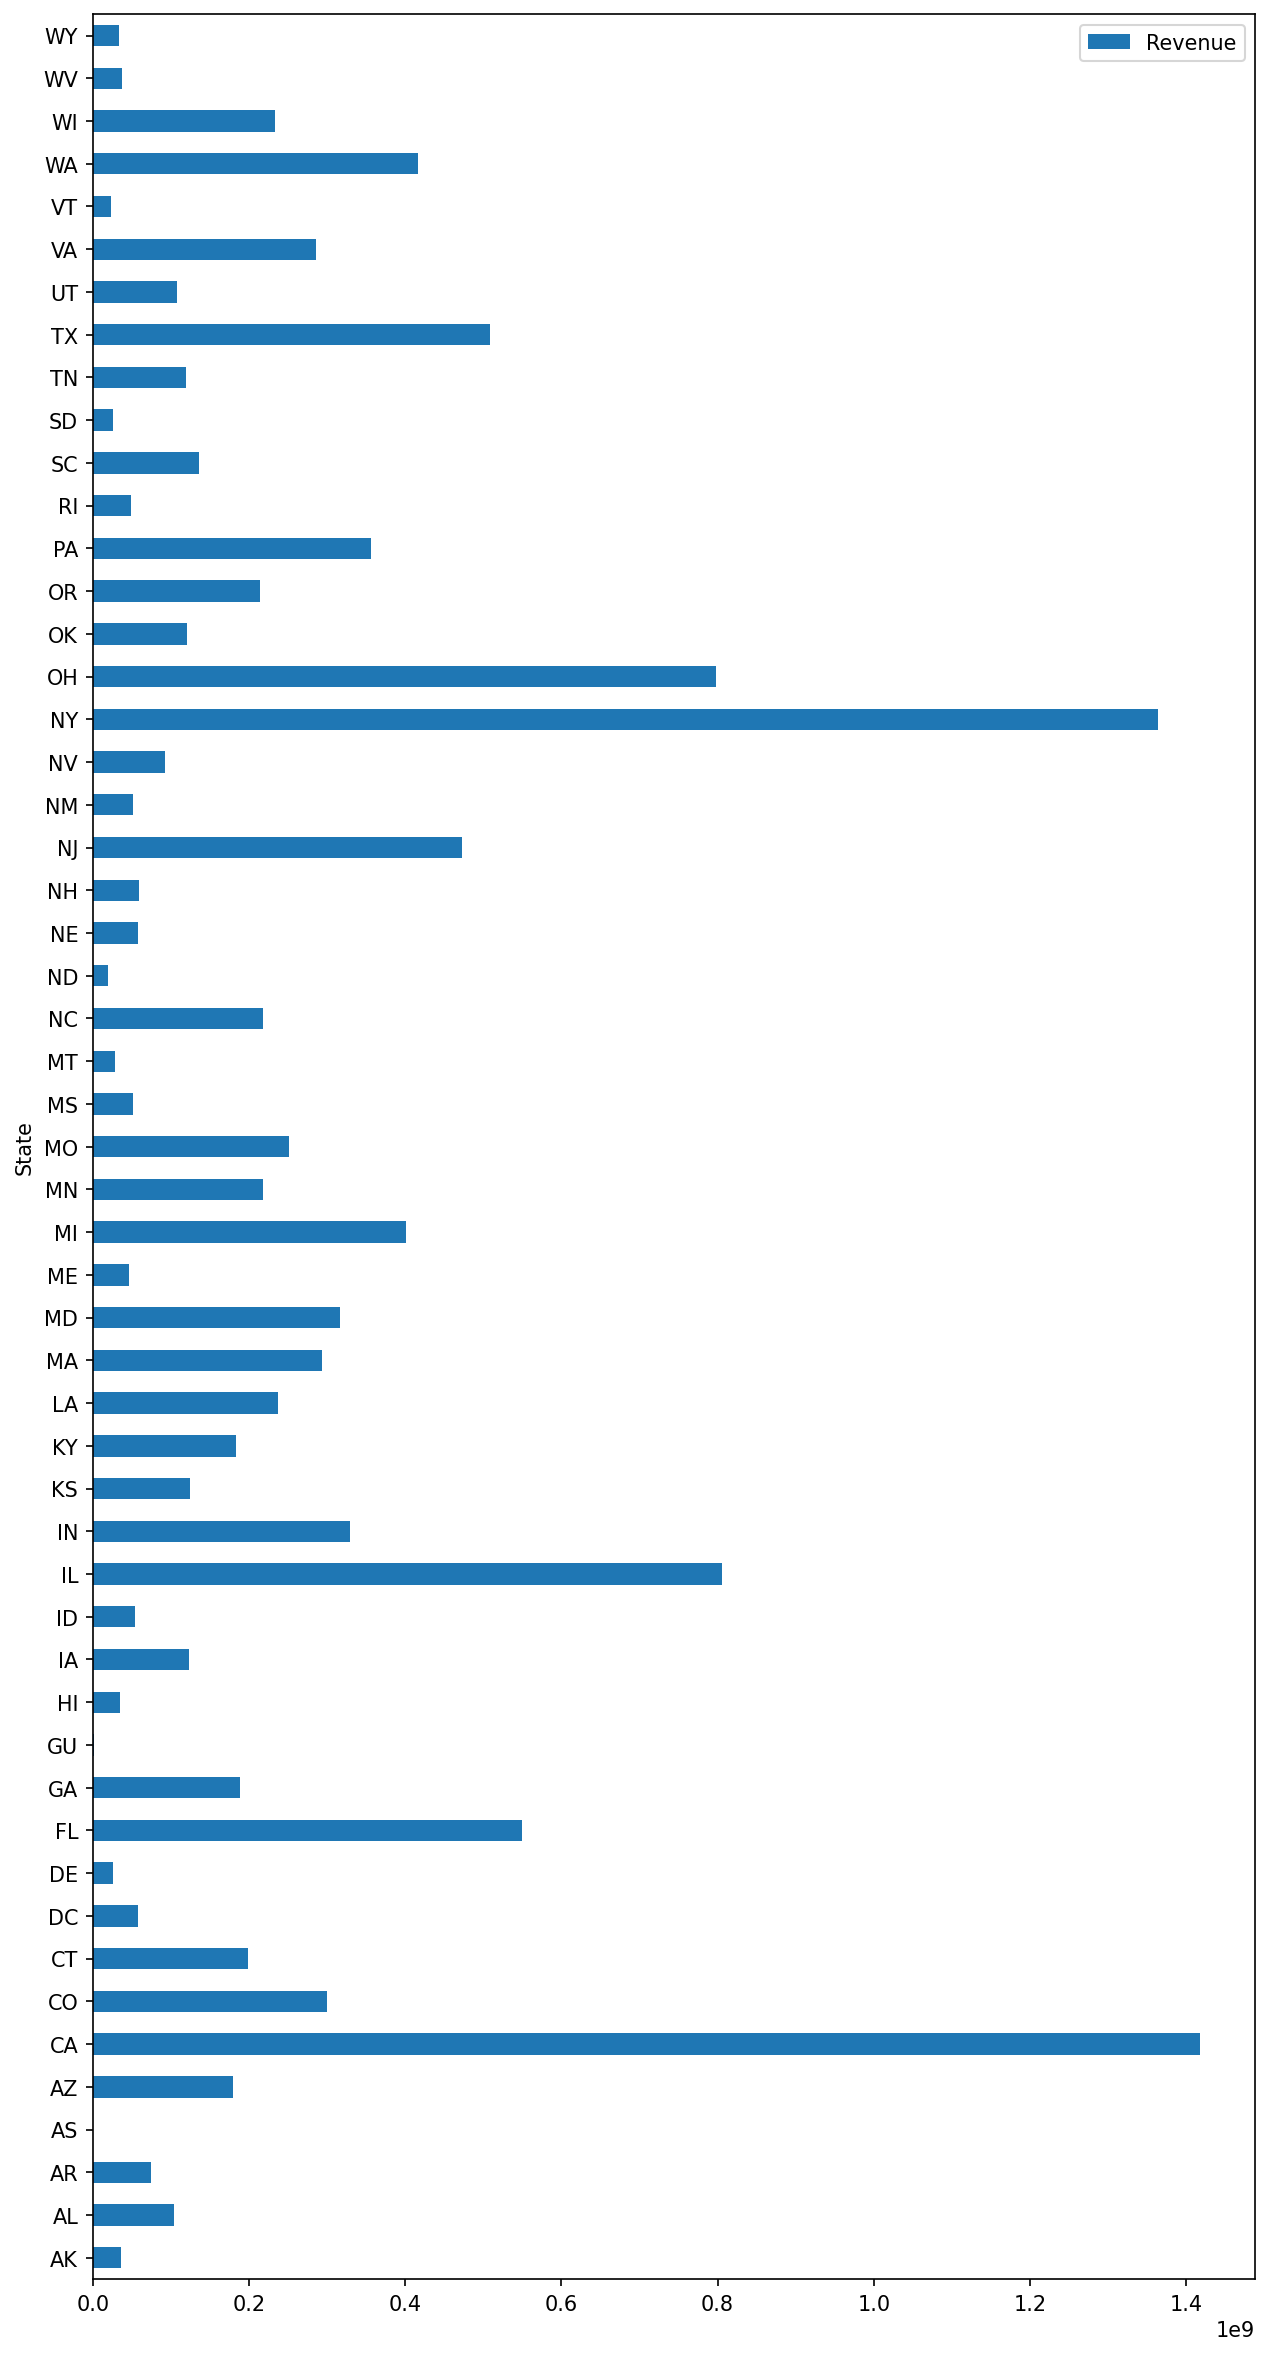

In [26]:
imls.plot(kind='barh', x='State', y='Revenue', figsize=(10,20)) 

## Univariate Data

*What might you want to know from a single dimension?*

Most often: distribution / density

`kind = 'hist'`, `kind = 'density'` (or 'kde')

### Histogram

Essentially, a bar chart that organizes continuous data into bins.

In [27]:
beer[['abv']].head()

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075


<AxesSubplot:ylabel='Frequency'>

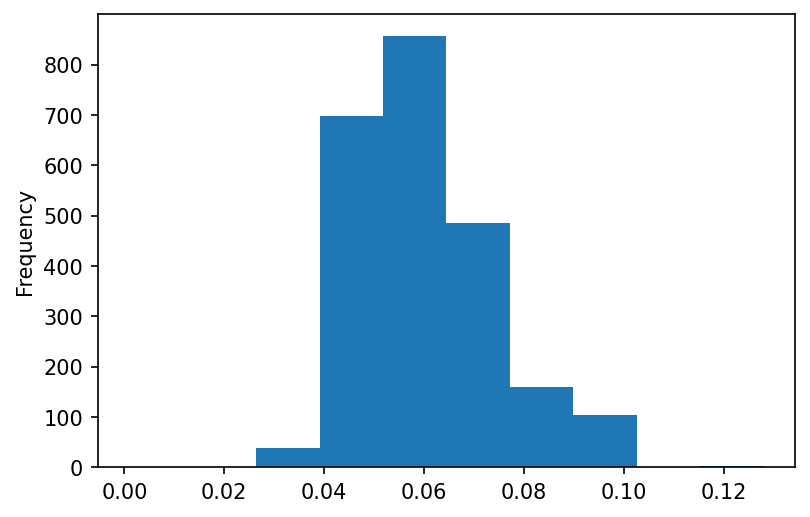

In [28]:
beer['abv'].plot(kind='hist')

- *What are the intervals for the bins?*
- *Is this a DataFrame or Series being plotted?*
  - *Will the other datatype plot in the same way?*

To change, use the `bins` argument to specify how many bars there will be across the range.

<AxesSubplot:ylabel='Frequency'>

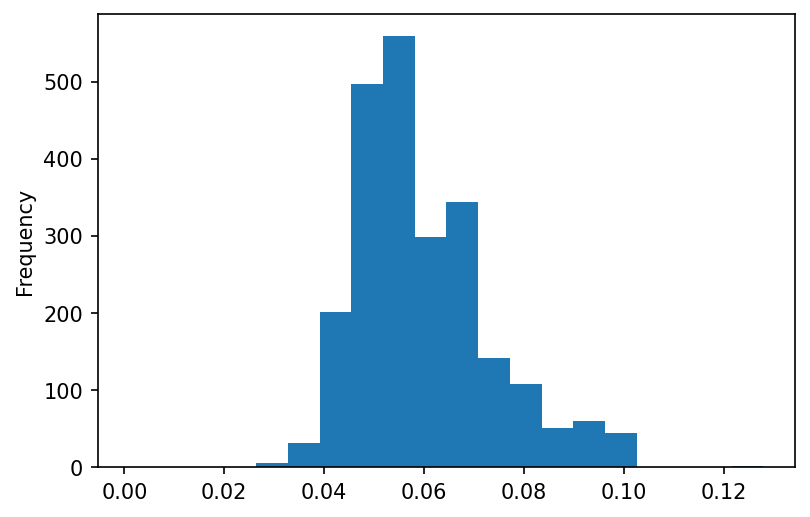

In [29]:
beer.abv.plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

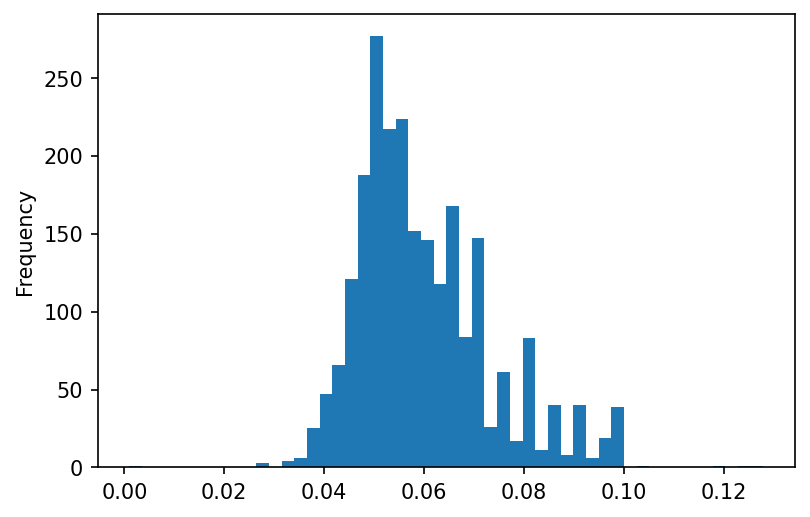

In [30]:
beer.abv.plot(kind='hist', bins=50)

Too little:

<AxesSubplot:ylabel='Frequency'>

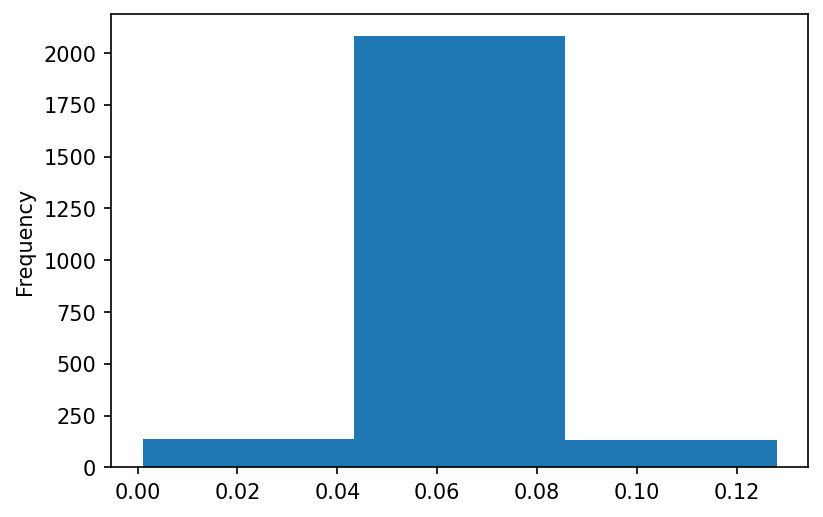

In [31]:
beer.abv.plot(kind='hist', bins=3)

Too much:

<AxesSubplot:ylabel='Frequency'>

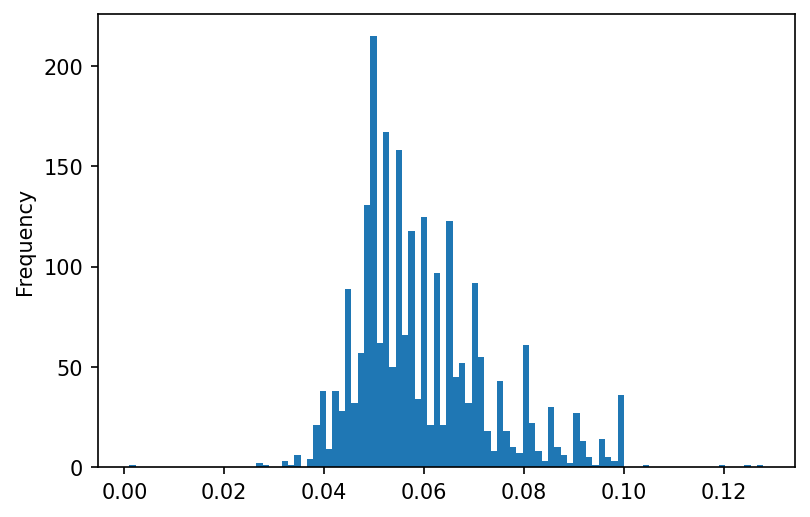

In [32]:
beer.abv.plot(kind='hist', bins=100)

### Kernel Density

Like a histogram, but with an interpolated line tracing the distribution shape.

In [33]:
beer.abv.plot(kind='den )

SyntaxError: EOL while scanning string literal (<ipython-input-33-b7e3f1702936>, line 1)

- interactive plots (note active plots)
- There are many options for customizing plots - this is where good online searching can help you!

## Multi-variate version of a histogram: Hexplot

- Color is used to show density across two dimensions.

<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

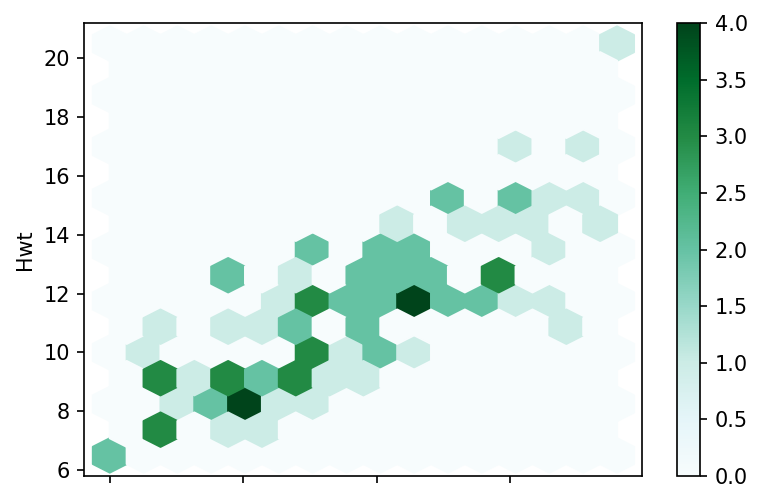

In [34]:
cats.plot(kind='hexbin', x='Bwt', y='Hwt', gridsize=15)

## Pie Charts: Univariate data that adds to a whole

`kind = 'pie'`

In [35]:
counts_by_category = beer.type.value_counts()
counts_by_category.head(2)

American IPA               424
American Pale Ale (APA)    245
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

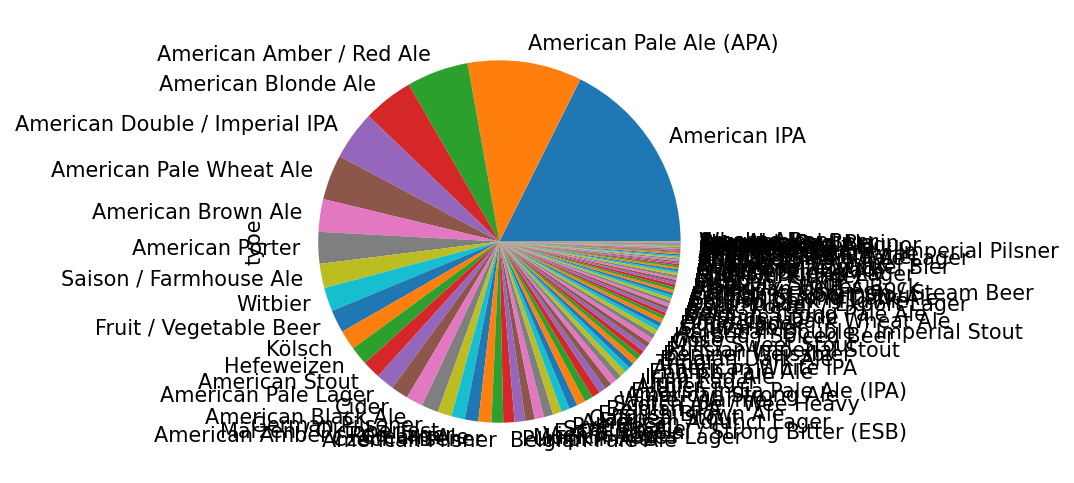

In [36]:
counts_by_category.plot(kind='pie')

Incomplete:

<AxesSubplot:ylabel='type'>

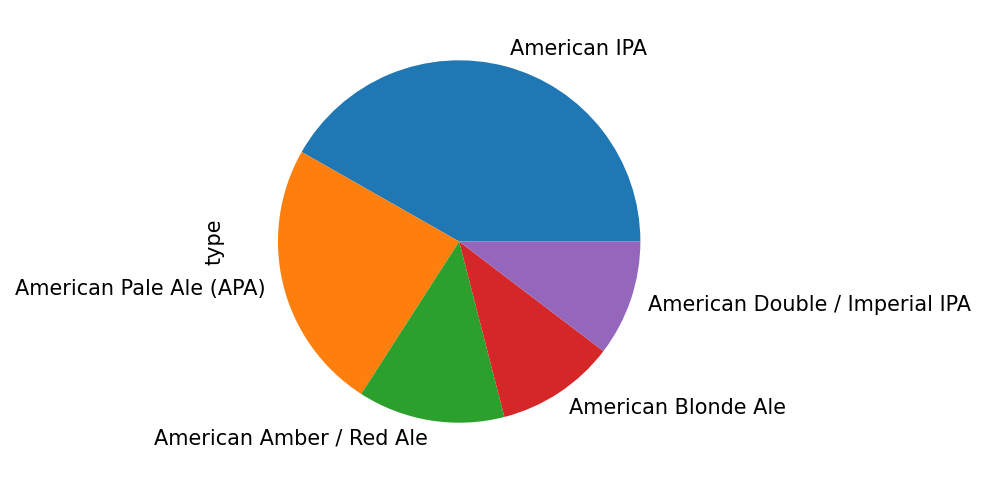

In [38]:
counts_by_category[:5].plot(kind='pie')

*How might we combine all the other values into an 'other' category?*

(No trick, just break down the problem)

## Line Chart

The default plot. Useful for showing change in continuous or interval data.

In [39]:
unique_movies = movies[['title', 'year']].drop_duplicates()
movies_by_year = unique_movies.groupby('year')[['title']].count()
movies_by_year.sample(1)

,title
year,
1996,274


<AxesSubplot:xlabel='year'>

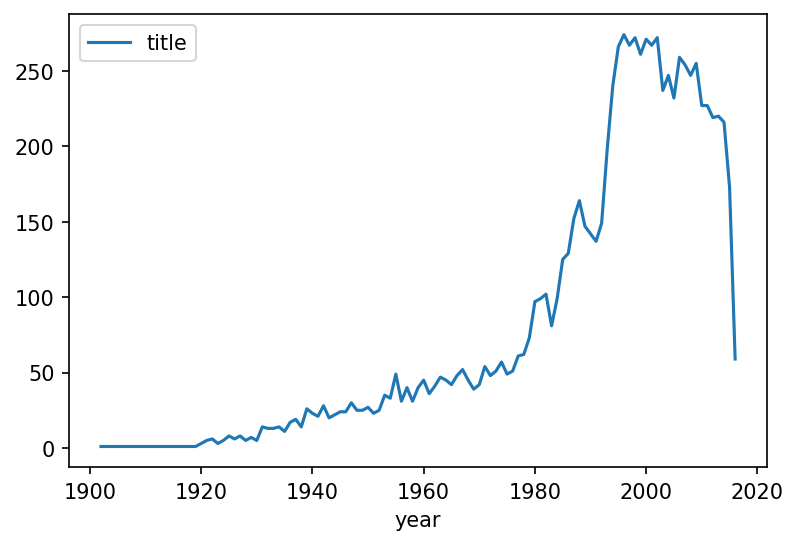

In [40]:
movies_by_year.plot() 

<AxesSubplot:xlabel='year'>

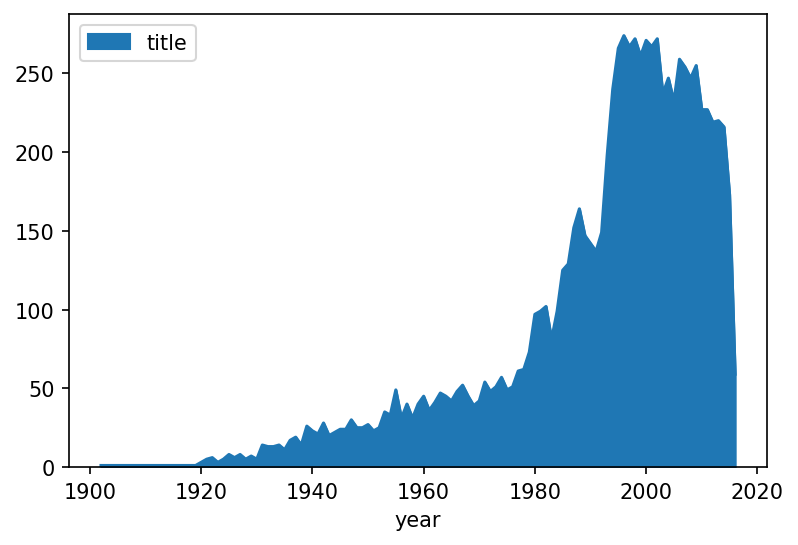

In [41]:
movies_by_year.plot(kind='area')

## <center>Exercises</center>

## <center>Where to go next?</center>

*matplotlib* is fairly low-level: it's very customizable, but more advanced to use.

Plotting in Pandas is higher-level: it builds on top of *matplotlib*, making some choices for you in exchange for ease of use.

If the out of the box plots don't work:

- (1) **Customizing default charts**: Read the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- (3) **Use matplotlib directly**: Use the [visualization gallery](https://matplotlib.org/gallery.html) for ideas.

![](../images/matplot-gallery.png)

### Seaborn

Looking for more advanced visualizations without the complexity of *matplotlib*? 

*Seaborn* is a high-level visualization library that makes certain types of *advanced* graphs easier to plot.

In [54]:
import seaborn as sns

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
![Seaborn Gallery](../images/seaborn-gallery.png)

#### Linear Regression with `lmplot`

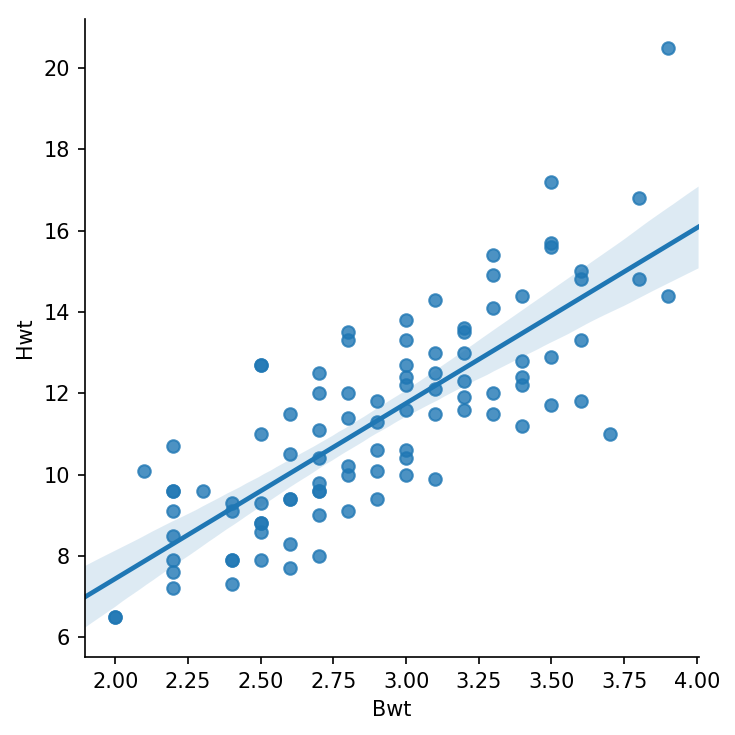

In [51]:
import seaborn as sns
sns.lmplot(data=cats, x='Bwt', y='Hwt')

Various alternate regression fits are possible: read the docs!

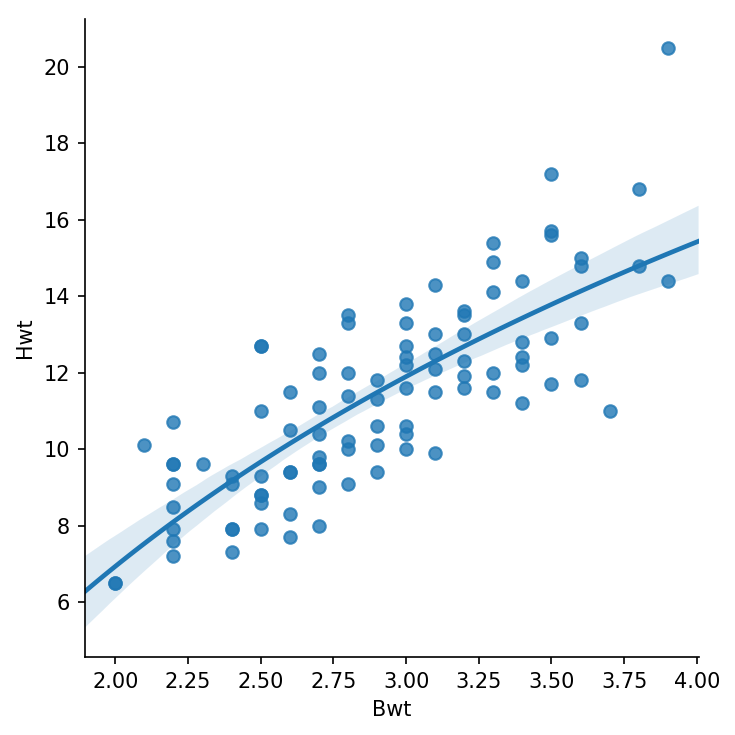

In [61]:
sns.lmplot(data=cats, x='Bwt', y='Hwt', logx=True)